In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.ion()


# Question 1.1

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

# import matplotlib as mpl
# mpl.use('Qt5Agg')

import matplotlib.pyplot as plt
plt.ion()


import warnings
warnings.filterwarnings('ignore')

In [3]:
def deg2rad(deg):
    return deg*np.pi/180

In [4]:
gravity = 9.8

# General inverted pendulum simulator
def pendulum(t, y, q):
    theta, omega = y
    dydt = [omega, -gravity/L * np.sin(theta) + q]
    return dydt

In [5]:
# System constants
L = 1 
gravity = 9.8

# Initial condition
theta = deg2rad(20)
dtheta_dt = .1

dt = 0.001
time = np.linspace(0,10,int(10/dt))

Text(0.5, 0, 'time')

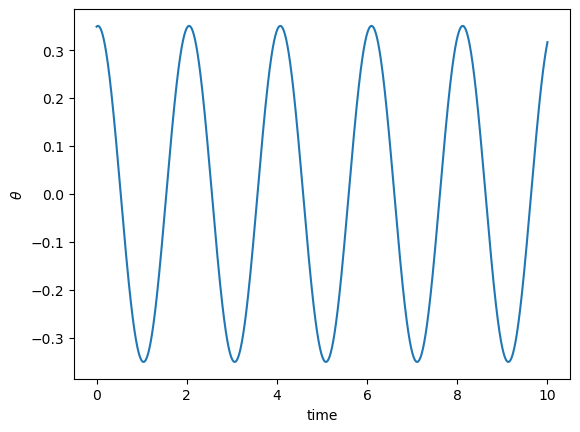

In [6]:
sol = solve_ivp(lambda t, y: pendulum(t, y, 0), 
                [0,10], [theta, dtheta_dt], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.figure(1)
plt.clf()
plt.plot(sol.t, sol.y[0,:])
plt.ylabel('$\\theta$')
plt.xlabel('time')

(-9.42477796076938, 9.42477796076938, -9.42477796076938, 9.42477796076938)

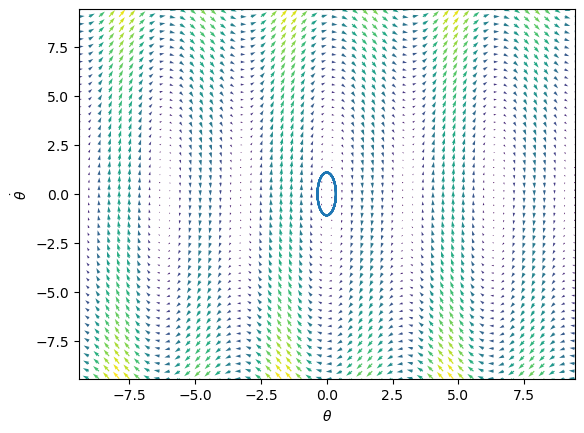

In [7]:
numpoints = 50
rng = 3*np.pi

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

dynamics = pendulum(0, [x1_vf, x2_vf], L)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(2)
plt.clf()
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])


(-10.0, 10.0, -7.5, 7.5)

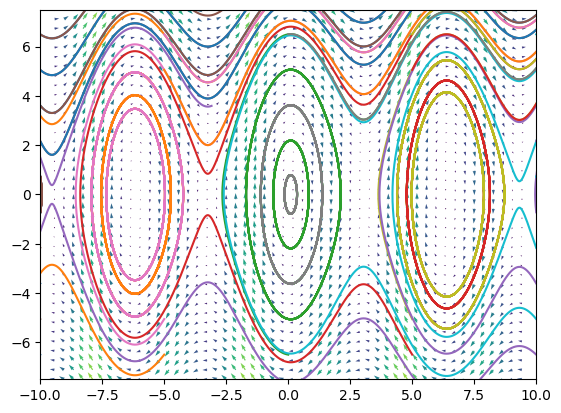

In [8]:
theta = np.linspace(-10, 10, 5)
dtheta_dt = np.linspace(-6.5, 6.5, 10)
[theta_start, dtheta_start] = np.meshgrid(theta, 
                                          dtheta_dt) 

#### Plot vector field
plt.figure(1)
plt.clf()

numpoints = 50
rng = 3*np.pi

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

'''
for q_value in [3.5, 7]:
    dynamics = pendulum(0, [x1_vf, x2_vf], q_value)
    norm = dynamics[0]**2 + dynamics[1]**2
    plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm, label=f'Torque (q) = {q_value}')
'''

dynamics = pendulum(0, [x1_vf, x2_vf], L)
norm = dynamics[0]**2 + dynamics[1]**2
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)


for init in zip(theta_start.reshape(1,50)[0], dtheta_start.reshape(1,50)[0]):
    # print(init)
    sol = solve_ivp(lambda t, y: pendulum(t, y, L), 
                    [0,10], init, 
                    t_eval = time, 
                    rtol=1e-8, atol = 1e-8)
    plt.plot(sol.y[0,:], sol.y[1,:])

plt.axis([-10, 10, -7.5, 7.5])    